<a href="https://colab.research.google.com/github/670510772/229351-Statlearningfordatasci1/blob/main/670510772_LAB08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ปฏิบัติการครั้งที่ 8

ดาวน์โหลดข้อมูลอุณหภูมิสูงสุดรายวันปี 1998-2019 จาก link ข้างล่างนี้  
https://donlapark.pages.dev/229351/data/CM_temp.csv

1. เปลี่ยนจากข้อมูลรายวันให้เป็นข้อมูลค่าเฉลี่ยรายเดือน
2. จงแบ่งข้อมูลโดยให้ Test set เป็นข้อมูลของ 24 เดือนสุดท้ายและ Training set เป็นข้อมูลก่อนหน้าทั้งหมด
3. ลองสร้างโมเดล Holt-Winters แบบต่างๆ (damped, non-damped, additive, multiplicative etc.) แล้วระบุโมเดลที่ดีที่ให้ค่า RMSE บน test set น้อยที่สุด
4. จงแสดงแผนภาพของข้อมูลจริงกับข้อมูลที่ได้ในข้อ 3

In [1]:
!wget -O CM_temp.csv https://donlapark.pages.dev/229351/data/CM_temp.csv

--2025-09-11 02:32:20--  https://donlapark.pages.dev/229351/data/CM_temp.csv
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.47.56, 172.66.44.200, 2606:4700:310c::ac42:2f38, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.47.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 139473 (136K) [text/csv]
Saving to: ‘CM_temp.csv’

CM_temp.csv         100%[===================>] 136.20K  --.-KB/s    in 0.02s   

2025-09-11 02:32:21 (6.13 MB/s) - ‘CM_temp.csv’ saved [139473/139473]



In [2]:
# import module ที่ต้องใช้
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from datetime import datetime

In [3]:
# ฟังก์ชันที่เปลี่ยน string ให้เป็น datetime
def parser(dates):
  return datetime.strptime(dates, '%Y-%m-%d')

# parse_dates ชื่อของคอลัมน์ที่จะเปลี่ยนให้เป็น datetime
# index_col ชื่อของคอลัมน์ที่จะให้เป็น index
# date_parser ฟังก์ชันที่เปลี่ยน string ให้เป็น datetime
data = pd.read_csv('CM_temp.csv', parse_dates=['Date'],
                                        index_col='Date',
                                        date_parser=parser)

data.tail()

/tmp/ipython-input-2705365328.py:8: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv('CM_temp.csv', parse_dates=['Date'],


,MaxTemp
Date,
2019-07-27,26.2
2019-07-28,34.2
2019-07-29,34.4
2019-07-30,33.5
2019-07-31,30.7


ข้อมูลที่ได้เป็นข้อมูลรายวัน ทำการหาค่าเฉลี่ยรายเดือนด้วย method `resample`

1. เปลี่ยนจากข้อมูลรายวันให้เป็นข้อมูลค่าเฉลี่ยรายเดือน

In [4]:
data_monthly = data['MaxTemp'].resample("M").mean()

data_monthly.head()

/tmp/ipython-input-3219926365.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_monthly = data['MaxTemp'].resample("M").mean()


,MaxTemp
Date,
1998-01-31,31.687097
1998-02-28,33.685714
1998-03-31,37.103226
1998-04-30,37.910000
1998-05-31,35.848387


In [5]:
def rmse(y_true,y_pred):
  # Inputs
  # y_true: actual value, y_pred: predicted values
  # Output: RMSE between y_true and y_pred
  return np.sqrt(np.mean(np.square(y_true-y_pred)))

In [6]:
data.tail()

,MaxTemp
Date,
2019-07-27,26.2
2019-07-28,34.2
2019-07-29,34.4
2019-07-30,33.5
2019-07-31,30.7


In [8]:
y = data['MaxTemp'].astype('float32')

print(y)

Date
1998-01-01    30.600000
1998-01-02    32.000000
1998-01-03    31.600000
1998-01-04    32.099998
1998-01-05    31.200001
                ...    
2019-07-27    26.200001
2019-07-28    34.200001
2019-07-29    34.400002
2019-07-30    33.500000
2019-07-31    30.700001
Name: MaxTemp, Length: 7882, dtype: float32


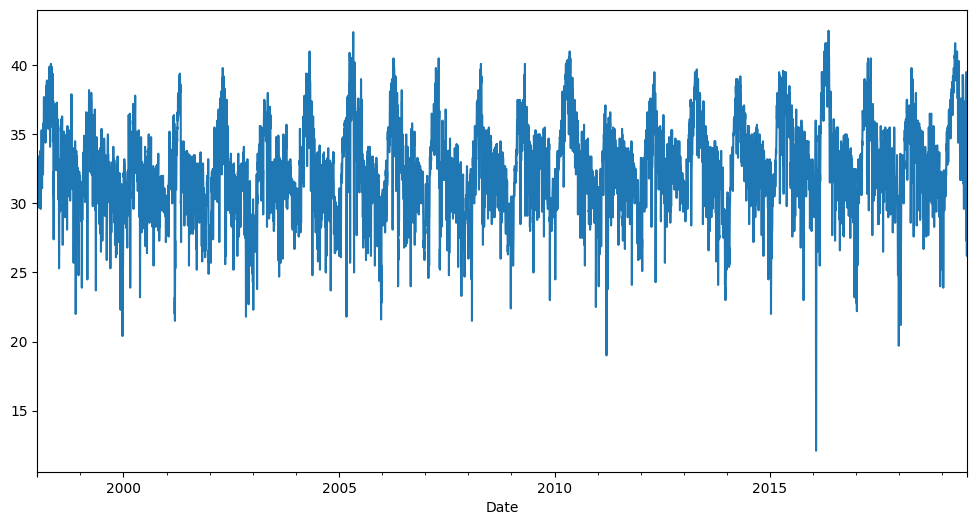

In [9]:
plt.figure(figsize=(12,6))
y.plot();

2. จงแบ่งข้อมูลโดยให้ Test set เป็นข้อมูลของ 24 เดือนสุดท้ายและ Training set เป็นข้อมูลก่อนหน้าทั้งหมด

In [25]:
def rmse(y_true,y_pred):
  # Inputs
  # y_true: actual value, y_pred: predicted values
  # Output: RMSE between y_true and y_pred
  return np.sqrt(np.mean(np.square(y_true-y_pred)))
train = y[:-24]
test = y[-24:]

print(test)

Date
2019-07-08    31.700001
2019-07-09    33.000000
2019-07-10    33.000000
2019-07-11    35.000000
2019-07-12    34.500000
2019-07-13    37.400002
2019-07-14    36.000000
2019-07-15    35.500000
2019-07-16    36.700001
2019-07-17    37.799999
2019-07-18    38.700001
2019-07-19    39.000000
2019-07-20    39.500000
2019-07-21    36.299999
2019-07-22    33.000000
2019-07-23    31.700001
2019-07-24    27.299999
2019-07-25    34.000000
2019-07-26    30.700001
2019-07-27    26.200001
2019-07-28    34.200001
2019-07-29    34.400002
2019-07-30    33.500000
2019-07-31    30.700001
Name: MaxTemp, dtype: float32


3. ลองสร้างโมเดล Holt-Winters แบบต่างๆ (damped, non-damped, additive, multiplicative etc.) แล้วระบุโมเดลที่ดีที่ให้ค่า RMSE บน test set น้อยที่สุด

In [34]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

es = ExponentialSmoothing(train, trend = 'add', damped=True, seasonal=None, seasonal_periods=12)
es_fit = es.fit(optimized=True)
yhat = es_fit.predict('2019-07-08', '2019-07-31')

print('RMSE:',rmse(test,yhat))

/tmp/ipython-input-3416486597.py:3: FutureWarning: the 'damped' keyword is deprecated, use 'damped_trend' instead.
  es = ExponentialSmoothing(train, trend = 'add', damped=True, seasonal=None, seasonal_periods=12)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


RMSE: 3.421035745848827


In [40]:
es = ExponentialSmoothing(train, trend = 'add', damped=None, seasonal=None, seasonal_periods=12)
es_fit = es.fit(optimized=True)
yhat = es_fit.predict('2019-07-08', '2019-07-31')

print('RMSE:',rmse(test,yhat))

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


RMSE: 3.423828104713354


In [41]:
es = ExponentialSmoothing(train, trend = 'additive', damped=True, seasonal=None, seasonal_periods=12)
es_fit = es.fit(optimized=True)
yhat = es_fit.predict('2019-07-09', '2019-07-31')

print('RMSE:',rmse(test,yhat))

/tmp/ipython-input-1856838751.py:1: FutureWarning: the 'damped' keyword is deprecated, use 'damped_trend' instead.
  es = ExponentialSmoothing(train, trend = 'additive', damped=True, seasonal=None, seasonal_periods=12)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


RMSE: 3.4266975262364405


In [42]:
es = ExponentialSmoothing(train, trend = 'multiplicative', damped=True, seasonal=None, seasonal_periods=12)
es_fit = es.fit(optimized=True)
yhat = es_fit.predict('2019-07-09', '2019-07-31')

print('RMSE:',rmse(test,yhat))

/tmp/ipython-input-3345278036.py:1: FutureWarning: the 'damped' keyword is deprecated, use 'damped_trend' instead.
  es = ExponentialSmoothing(train, trend = 'multiplicative', damped=True, seasonal=None, seasonal_periods=12)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


RMSE: 3.4266958249123514


In [43]:
es_fit.params

{'smoothing_level': np.float64(0.7404065475946694),
 'smoothing_trend': np.float64(0.0),
 'smoothing_seasonal': np.float64(nan),
 'damping_trend': np.float64(0.9779783435786684),
 'initial_level': np.float64(31.366198993439546),
 'initial_trend': np.float64(1.0249012985146029),
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

4. จงแสดงแผนภาพของข้อมูลจริงกับข้อมูลที่ได้ในข้อ 3

/tmp/ipython-input-3641464136.py:3: FutureWarning: the 'damped' keyword is deprecated, use 'damped_trend' instead.
  es = ExponentialSmoothing(train, trend = 'add', damped=True, seasonal=None, seasonal_periods=12)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


RMSE: 3.421035745848827


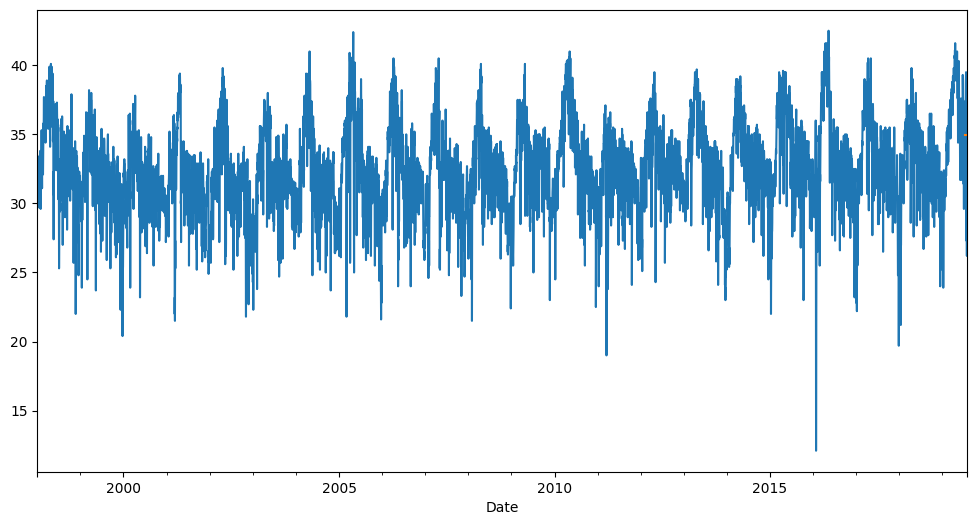

In [44]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

es = ExponentialSmoothing(train, trend = 'add', damped=True, seasonal=None, seasonal_periods=12)
es_fit = es.fit(optimized=True)
yhat = es_fit.predict('2019-07-08', '2019-07-31')

print('RMSE:',rmse(test,yhat))
plt.figure(figsize=(12,6))
y.plot()
yhat.plot();